# Retail Challenge

# Parte 1: AED

## Carga de dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [3]:
df.sample(10)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
176493     552000      23199                     JUMBO BAG APPLES         1   
326849     565596      22086      PAPER CHAIN KIT 50'S CHRISTMAS         14   
532209     580983      21813         GARLAND WITH STARS AND BELLS        10   
105714     545235      22748            POPPY'S PLAYHOUSE KITCHEN         6   
13311      537434      21147         JINGLE BELLS TREE DECORATION         1   
6986       536984      21917      SET 12 KIDS  WHITE CHALK STICKS         1   
81607      543166      22846           BREAD BIN DINER STYLE RED          1   
473038     576779      23296       SET OF 6 TEA TIME BAKING CASES         1   
437748     574298     72800E  4 IVORY DINNER CANDLES SILVER FLOCK         2   
337357     566446      21494       ROTATING LEAVES T-LIGHT HOLDER         1   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
176493  05/05/2020 15:56        4.13          NaN  United Kingdom  
326849  05/09/2020 14:27        2.95      16444.0  United Kingdom  
532209  06/12/2020 16:26        3.29          NaN  United Kingdom  
105714  01/03/2020 10:31        2.10      12683.0          France  
13311   06/12/2019 16:57        2.51          NaN  United Kingdom  
6986    03/12/2019 14:35        0.42      17841.0  United Kingdom  
81607   04/02/2020 08:27       16.95      13488.0  United Kingdom  
473038  16/11/2020 13:25        1.25      14554.0  United Kingdom  
437748  03/11/2020 15:56        3.29          NaN  United Kingdom  
337357  12/09/2020 15:40        2.46          NaN  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.

In [5]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [6]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [7]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 

In [8]:
df.describe().T

count                           mean                  min  \
QUANTITY      541909.0                        9.55225             -80995.0   
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%  \
QUANTITY                      1.0                  3.0                 10.0   
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [9]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

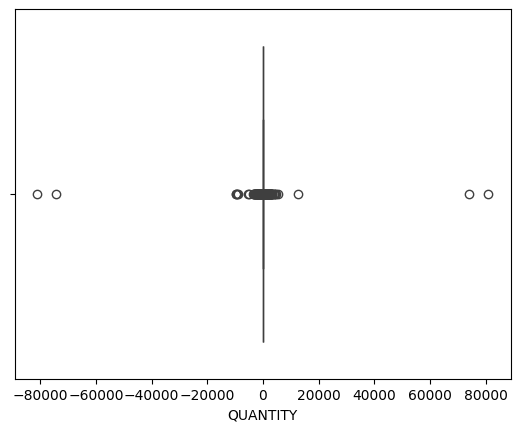

In [10]:
sns.boxplot(x=df['QUANTITY'])

<Axes: xlabel='UNIT_PRICE'>

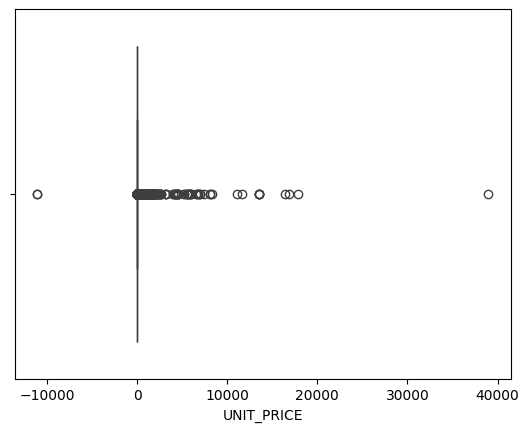

In [11]:
sns.boxplot(x=df['UNIT_PRICE'])

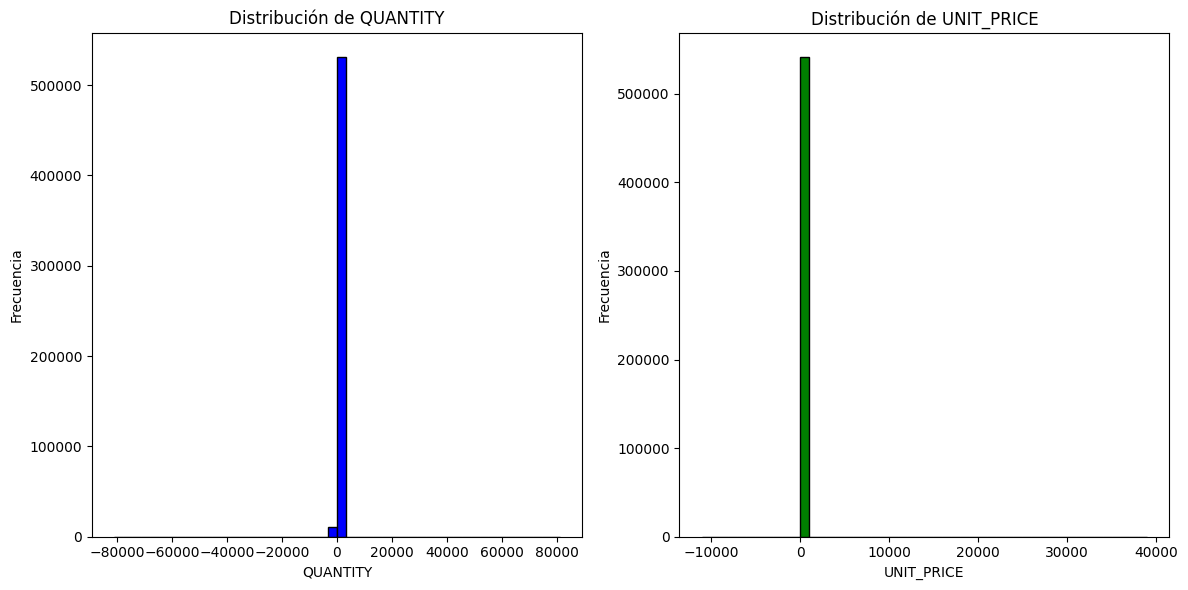

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

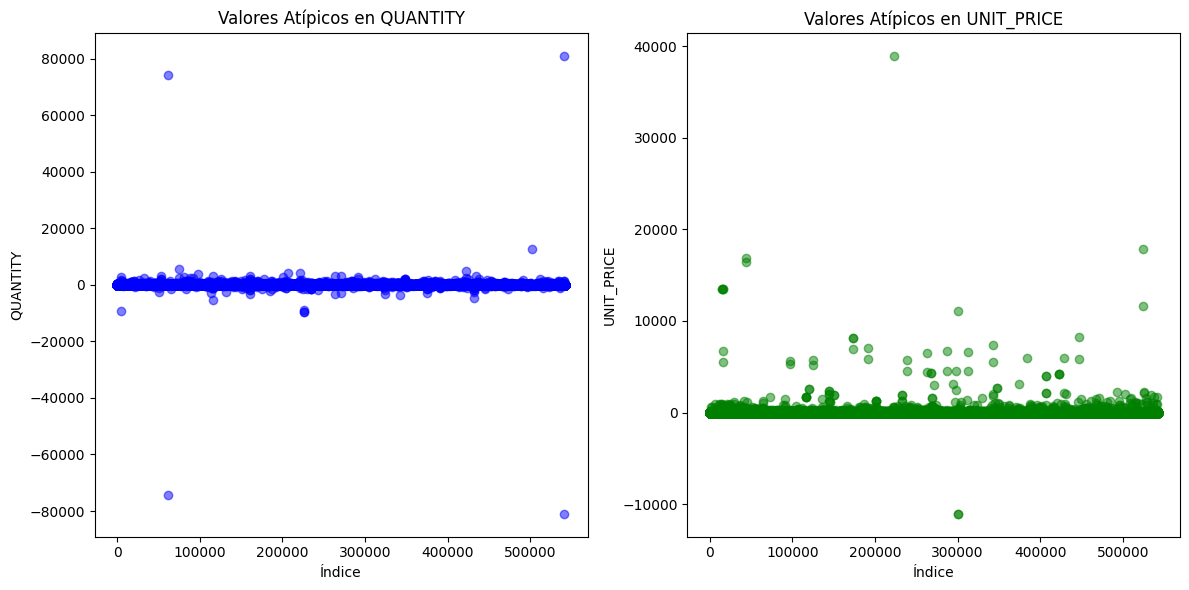

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Tratamiendo de valores ausentes.

In [14]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [15]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [16]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [17]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [18]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

In [19]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [20]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [21]:
df['CUSTOMER_ID'].fillna('unknown', inplace=True)

In [22]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

## Tratamiento de duplicados.

In [23]:
df = df.drop_duplicates().reset_index(drop=True)

In [24]:
df.duplicated().sum()

0

## Seccion APARTE

### Quantity

In [25]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03     15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00     unknown  United Kingdom  
60844  2020-01-18 10:17:00        1.04     12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00     unknown  United Kingdom  
114433 2020-03-09 17:25:00        0.00     unknown  United Kingdom  
129826 2020-03-23 17:28:00        0.00     unknown  United Kingdom  
158057 2020-04-18 13:08:00        2.10     15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00     unknown  United Kingdom  
222766 2020-06-14 10:36:00        0.00     unknown  United Kingdom  
222767 2020-06-14 10:37:00        0.00     unknown  United Kingdom  
222768 2020-06-14 10:37:00        0.00     unknown  United Kingdom  
260766 2020-07-14 14:27:00        0.00     unknown  United Kingdom  
371215 2020-10-04 11:42:00        0.00     unknown  United Kingdom  
426346 2020-10-31 15:16:00        0.00     unknown  United Kingdom  
426347 2020-10-31 15:16:00        0.00     unknown  United Kingdom  
426349 2020-10-31 15:17:00        0.00     unknown  United Kingdom  
533660 2020-12-09 09:27:00        2.08     16446.0  United Kingdom

In [26]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [27]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

In [28]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10     15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04     12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82     18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10     15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72     13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00     unknown  United Kingdom  
267686 2020-07-19 17:04:00        0.06     14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21     12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00     13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08     16446.0  United Kingdom

### Unit Price

In [29]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
190784     553521      22644       CERAMIC CHERRY CAKE MONEY BANK         1   
191156     553539      22523              CHILDS GARDEN FORK PINK         1   
483224     577959      85107                               check?       374   
225893     556939     46000M         POLYESTER FILLER PAD 45x45cm        80   
191150     553539      22666      RECIPE BOX PANTRY YELLOW DESIGN         1   
243797     558725      84944                                found        37   
310065     564530      21172                    PARTY METAL SIGN          1   
440837     574879      22625                   RED KITCHEN SCALES         2   
474846     577314      23407       SET OF 2 TRAYS HOME SWEET HOME         2   
239473     558340      22385            JUMBO BAG SPACEBOY DESIGN         1   
40880      539856      21258           VICTORIAN SEWING BOX LARGE         3   
40875      539856      21912             VINTAGE SNAKES & LADDERS         1   
40826      539856     84872A  TEATIME FUNKY FLOWER BACKPACK FOR 2         2   
103150     545176      22698       PINK REGENCY TEACUP AND SAUCER         1   
426766     573751     46000U                                check        10   
311153     564651      23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
14056      537534      22366                     DOORMAT AIRMAIL          1   
310067     564530      20682     RED RETROSPOT CHILDRENS UMBRELLA         1   
431514     574175      22065       CHRISTMAS PUDDING TRINKET POT         12   
417762     573107      21794                           adjustment        10   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
190784 2020-05-17 14:35:00         0.0     unknown  United Kingdom  
191156 2020-05-17 15:27:00         0.0     unknown  United Kingdom  
483224 2020-11-22 12:11:00         0.0     unknown  United Kingdom  
225893 2020-06-15 16:34:00         0.0     unknown  United Kingdom  
191150 2020-05-17 15:27:00         0.0     unknown  United Kingdom  
243797 2020-07-01 14:31:00         0.0     unknown  United Kingdom  
310065 2020-08-25 14:57:00         0.0     unknown  United Kingdom  
440837 2020-11-07 13:22:00         0.0     13014.0  United Kingdom  
474846 2020-11-18 13:23:00         0.0     12444.0          Norway  
239473 2020-06-28 14:01:00         0.0     unknown  United Kingdom  
40880  2019-12-22 14:41:00         0.0     unknown  United Kingdom  
40875  2019-12-22 14:41:00         0.0     unknown  United Kingdom  
40826  2019-12-22 14:41:00         0.0     unknown  United Kingdom  
103150 2020-02-28 14:19:00         0.0     unknown  United Kingdom  
426766 2020-11-01 09:33:00         0.0     unknown  United Kingdom  
311153 2020-08-26 14:19:00         0.0     14646.0     Netherlands  
14056  2019-12-07 11:48:00         0.0     unknown  United Kingdom  
310067 2020-08-25 14:57:00         0.0     unknown  United Kingdom  
431514 2020-11-03 11:47:00         0.0     14110.0  United Kingdom  
417762 2020-10-27 15:06:00         0.0     unknown  United Kingdom

In [30]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.109999695502573

In [31]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

In [32]:
# VAMOS A BORRAR ESTOS DATOS

# df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'] == 'unknown') & (df['CUSTOMER_ID'] == 'unknown')].dropna(inplace=True).reset_index(drop=True)

## Segmentacion por clusteres.

In [33]:
data_positive_quantity = df.copy()

# Calcular el gasto total por cliente usando .loc para evitar SettingWithCopyWarning
data_positive_quantity.loc[:, 'TOTAL_SPENT'] = data_positive_quantity['QUANTITY'] * data_positive_quantity['UNIT_PRICE']

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_SPENT=pd.NamedAgg(column='TOTAL_SPENT', aggfunc='sum'),
    TOTAL_QUANTITY=pd.NamedAgg(column='QUANTITY', aggfunc='sum')
).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_SPENT  TOTAL_QUANTITY
0     12346.0     77183.60           74215
1     12347.0      4310.00            2458
2     12348.0      1797.24            2341
3     12349.0      1757.55             631
4     12350.0       334.40             197


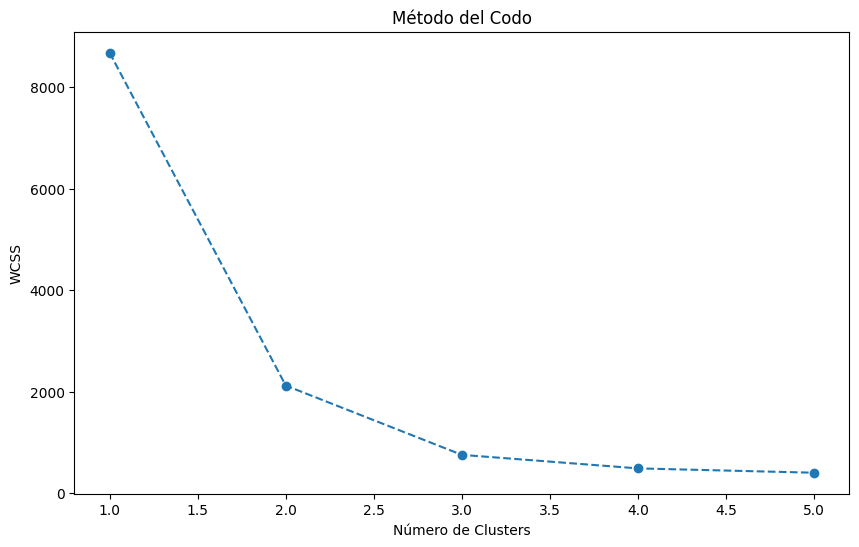

In [34]:

# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

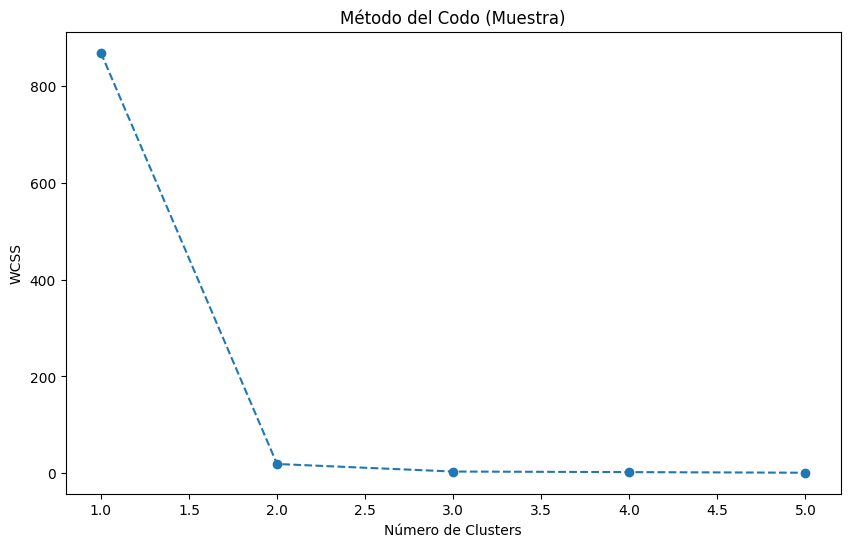

In [35]:
# Tomar una muestra del 10% del dataset de clientes para reducir la carga computacional
sampled_customer_data = customer_data.sample(frac=0.1, random_state=42)

# Seleccionar las características para la segmentación
features_sampled = sampled_customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
features_sampled_scaled = scaler.fit_transform(features_sampled)

# Determinar el número óptimo de clusters utilizando el método del codo con la muestra
wcss_sampled = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_sampled_scaled)
    wcss_sampled.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido y la muestra
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss_sampled, marker='o', linestyle='--')
plt.title('Método del Codo (Muestra)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

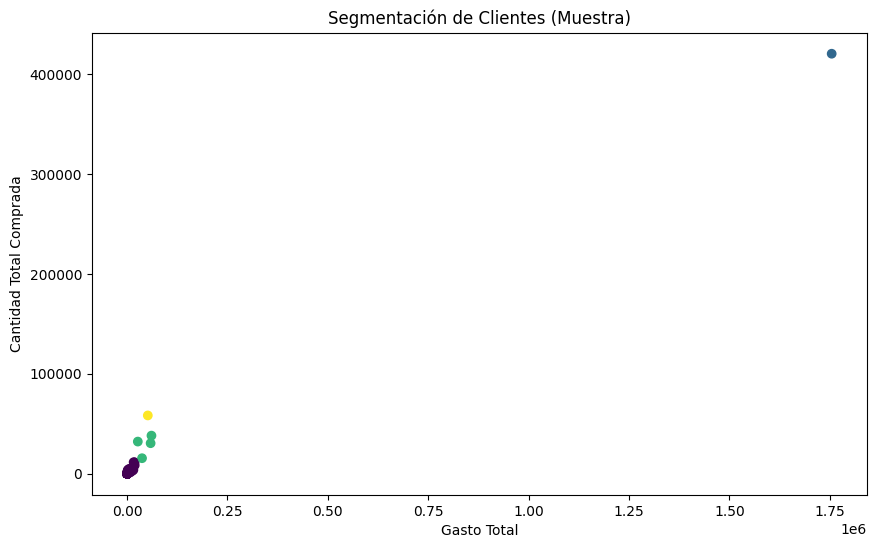

In [36]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
sampled_customer_data['CLUSTER'] = kmeans.fit_predict(features_sampled_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(sampled_customer_data['TOTAL_SPENT'], sampled_customer_data['TOTAL_QUANTITY'], c=sampled_customer_data['CLUSTER'], cmap='viridis')
plt.title('Segmentación de Clientes (Muestra)')
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad Total Comprada')
plt.show()

## Segmentacion por grupos.

In [37]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY  \
292034     562789      23203          JUMBO BAG DOILEY PATTERNS       400   
348735     567679      21902              KEY FOB  FRONT  DOOR          1   
498703     578998      22666    RECIPE BOX PANTRY YELLOW DESIGN         1   
147624     549295      22745         POPPY'S PLAYHOUSE BEDROOM          2   
55906      541104      85174                  S/4 CACTI CANDLES         1   
441237     574901      23483  HANGING  BUTTERFLY T-LIGHT HOLDER        12   
9879       537225     84531B              BLUE KNITTED EGG COSY         3   
14285      537605      84692        BOX OF 24 COCKTAIL PARASOLS         2   
498464     578993      23109         PACK OF SIX LED TEA LIGHTS         3   
394957     571281      23406         HOME SWEET HOME KEY HOLDER         4   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  \
292034 2020-08-09 13:50:00        1.79     14646.0     Netherlands   
348735 2020-09-21 16:15:00        0.65     14606.0  United Kingdom   
498703 2020-11-27 16:05:00        2.95     15436.0  United Kingdom   
147624 2020-04-07 19:49:00        4.13     unknown  United Kingdom   
55906  2020-01-13 14:29:00        4.13     unknown  United Kingdom   
441237 2020-11-07 15:15:00        1.25     17158.0  United Kingdom   
9879   2019-12-05 16:41:00        1.95     12748.0  United Kingdom   
14285  2019-12-07 13:13:00        0.42     16221.0  United Kingdom   
498464 2020-11-27 15:38:00        2.89     15987.0  United Kingdom   
394957 2020-10-16 13:23:00        5.39     14088.0  United Kingdom   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
292034         716.00      8  2020    6  
348735           0.65      9  2020    0  
498703           2.95     11  2020    4  
147624           8.26      4  2020    1  
55906            4.13      1  2020    0  
441237          15.00     11  2020    5  
9879             5.85     12  2019    3  
14285            0.84     12  2019    5  
498464           8.67     11  2020    4  
394957          21.56     10  2020    4

# Visualizaciones

##  Frequency. 
---
Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

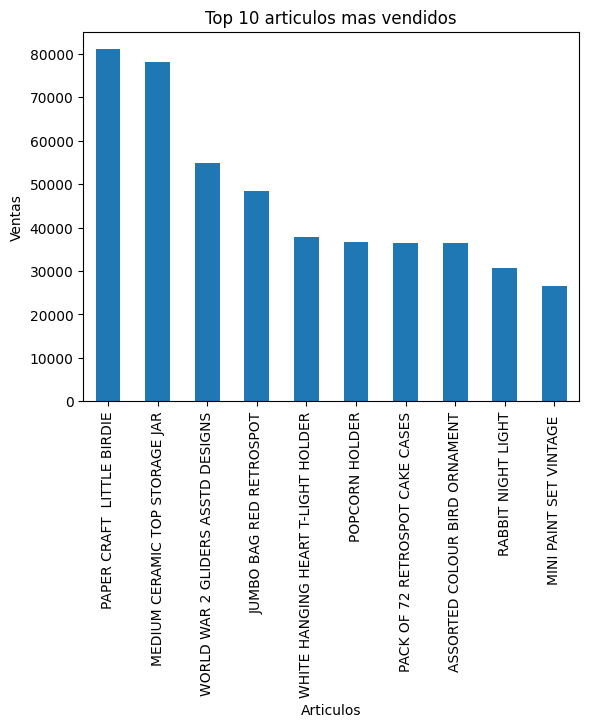

In [38]:
# ARTICULOS MAS VENDIDOS
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos mas vendidos",ylabel="Ventas",xlabel="Articulos")
plt.show()

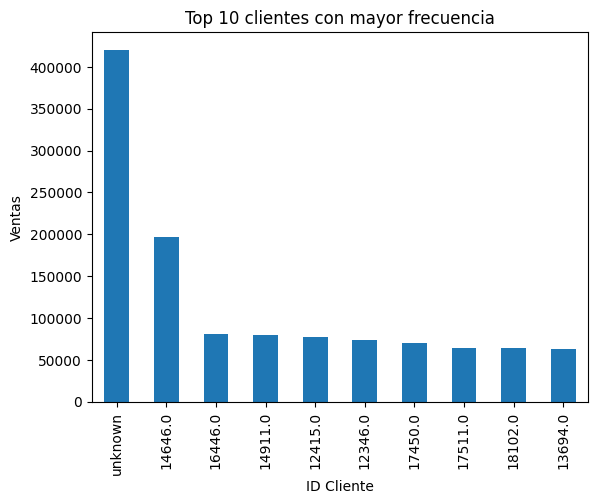

In [39]:
#CLIENTES CON MAS COMPRAS
top_10_products = df.groupby('CUSTOMER_ID')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor frecuencia",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

## Frecuencia por orden de compra

In [40]:
df_freq=df[df['CUSTOMER_ID']!='unknown']

In [41]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO")
fig.show()

##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

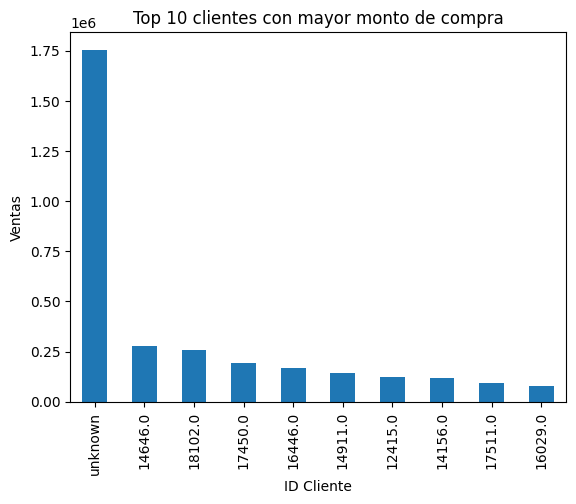

In [42]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

### Histograma de ganancias

In [43]:
df_mon=df[df['CUSTOMER_ID']!='unknown']

In [44]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE")
fig.show()

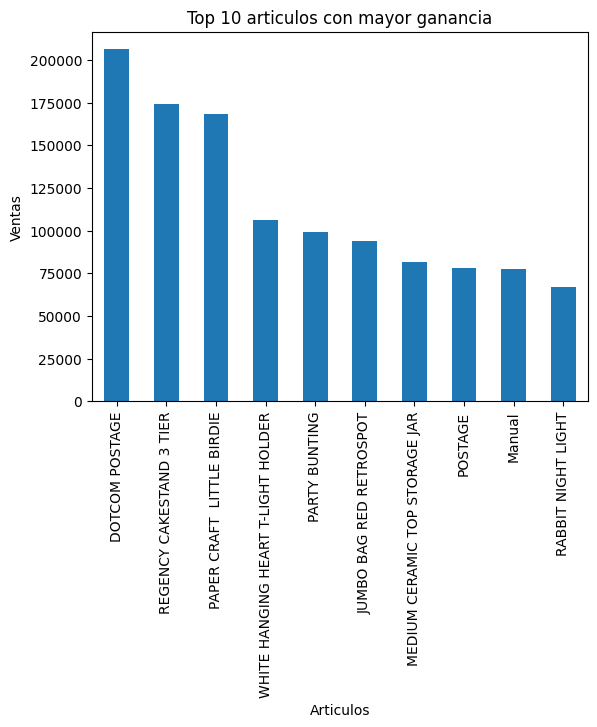

In [45]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [46]:
# df.groupby('INVOICE_DATE').agg({'CUSTOMER_ID':'sum'}).reset_index()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.


In [47]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55     17850.0  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75     17850.0  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   

   MONTH  YEAR  DAY  
0     12  2019    6  
1     12  2019    6  
2     12  2019    6  
3     12  2019    6  
4     12  2019    6

In [48]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
print(orders_per_month.head(12))
print()

mean_orders= orders_per_month['CUSTOMER_ID'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
1              742     689811.610       929.665243
2              759     522545.560       688.465823
3              975     716215.260       734.579754
4              857     536968.491       626.567667
5             1057     769296.610       727.811362
6              992     760547.010       766.680454
7              950     718076.121       755.869601
8              936     757841.380       809.659594
9             1267    1056435.192       833.808360
10            1365    1151263.730       843.416652
11            1665    1503866.780       903.223291
12            1266    1459243.060      1152.640648

Promedio de compra por mes: 1069.25


In [49]:
fig = px.histogram(orders_per_month, x="Orders_per_user")
fig.show()

### Dias sin comprar

In [50]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['days_since_last_sale']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  days_since_last_sale
0        12346.0 2020-01-18 10:01:00                  1627
1        12347.0 2020-12-07 15:52:00                  1303
2        12348.0 2020-09-25 13:13:00                  1376
3        12349.0 2020-11-21 09:51:00                  1319
4        12350.0 2020-02-02 16:01:00                  1612
...          ...                 ...                   ...
4334     18281.0 2020-06-12 10:53:00                  1481
4335     18282.0 2020-12-02 11:43:00                  1308
4336     18283.0 2020-12-06 12:02:00                  1304
4337     18287.0 2020-10-28 09:29:00                  1343
4338     unknown 2020-12-09 10:26:00                  1301

[4339 rows x 3 columns]

In [51]:
df_recency_merged=df.merge(df_recency,on='CUSTOMER_ID')

In [52]:
df_recency_merged_filt=df_recency_merged[df_recency_merged['CUSTOMER_ID']!='unknown']

In [53]:
fig = px.histogram(df_recency_merged_filt, x="days_since_last_sale")
fig.show()

## ¿Cúal es el país donde más se vende?

In [54]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país')
fig_coun.show()

In [55]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [56]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [57]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE                                
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536367      84879   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE                                                         
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00        ASSORTED COLOUR BIRD ORNAMENT        32   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE                                                                 
2019-12-01 08:26:00        2.55     17850.0  United Kingdom          15.30   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        2.75     17850.0  United Kingdom          22.00   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        3.39     17850.0  United Kingdom          20.34   
2019-12-01 08:26:00        7.65     17850.0  United Kingdom          15.30   
2019-12-01 08:26:00        4.25     17850.0  United Kingdom          25.50   
2019-12-01 08:28:00        1.85     17850.0  United Kingdom          11.10   
2019-12-01 08:28:00        1.85     17850.0  United Kingdom          11.10   
2019-12-01 08:34:00        1.69     13047.0  United Kingdom          54.08   

                     MONTH  YEAR  DAY  
INVOICE_DATE                           
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:34:00     12  2019    6

In [58]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [59]:
fig = px.line(df_series, markers=True,title='Serie de ventas')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [60]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

In [61]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas')
fig_1.show()
